In [185]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def adjust_brightness(image, target_brightness=128, threshold=30):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    avg_brightness = np.mean(gray)
    beta = target_brightness - avg_brightness
    if abs(beta) > threshold:
        new_image = cv2.convertScaleAbs(image, alpha=1.0, beta=beta)
    else:
        new_image = image
    return new_image

def process_image(image_path, output_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image from {image_path}")
        return

    # Step 1: Adjust brightness
    image = adjust_brightness(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Crop or detect ROI (if applicable)
    # Uncomment and define ROI coordinates if you know the barcode region
    # x, y, w, h = 100, 200, 400, 100  # Example coordinates
    # gray = gray[y:y+h, x:x+w]

    # Step 3: Apply Sobel filter to detect edges
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(grad_x, grad_y)
    sobel = cv2.convertScaleAbs(sobel)

    # Step 4: Sharpen the image to enhance lines
    blurred = cv2.GaussianBlur(sobel, (5, 5), 0)
    sharpened = cv2.addWeighted(sobel, 2.0, blurred, -1.0, 0)

    # Step 5: Apply binary threshold
    _, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 6: Morphological closing to connect barcode lines
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 3))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Step 7: Invert the image (invert the binary image for barcode detection)
    inverted = cv2.bitwise_not(binary)
    
    #Step 8: Binarize GrayScale Image
    _, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Show intermediate and final results
    show_image("Original Grayscale", gray)
    show_image("Sobel Edge Detection", sobel)
    show_image("Sharpened Image", sharpened)
    show_image("Binary Thresholded", binary)
    show_image("Inverted Image", inverted)
    
    
    # Save the final processed image
    cv2.imwrite(output_path, gray)  # Save the filled image
    print(f"Processed image saved to {output_path}")



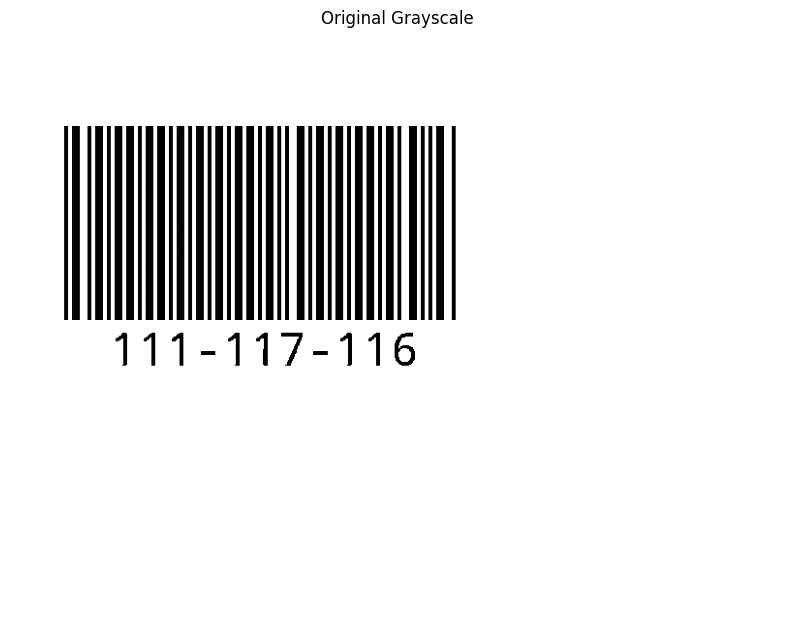

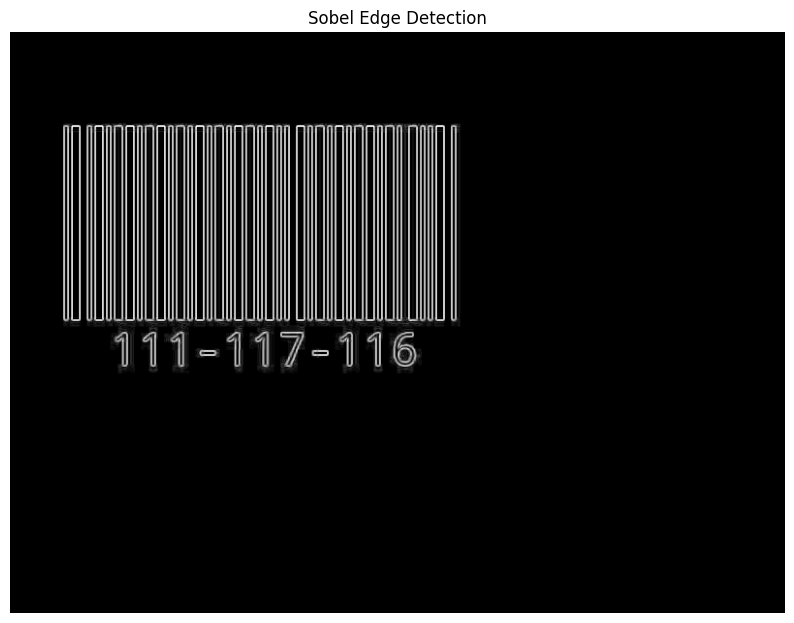

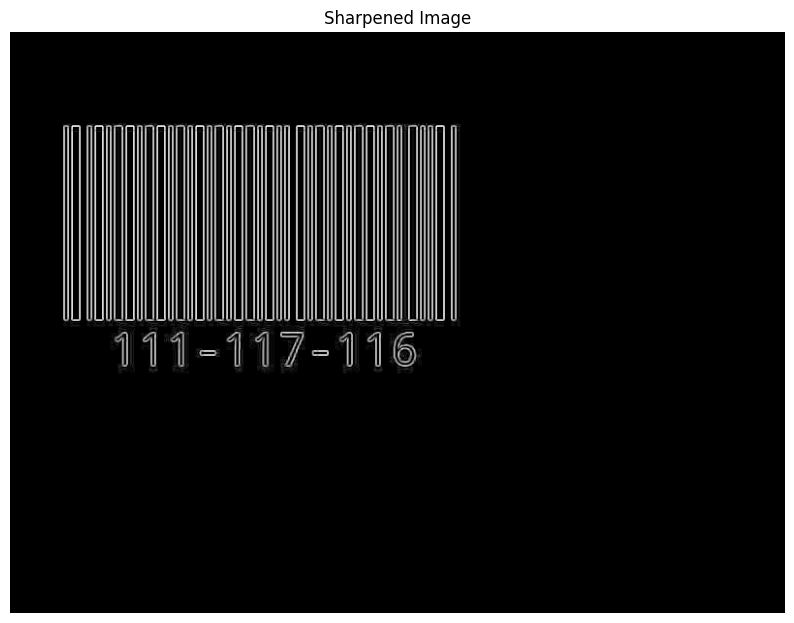

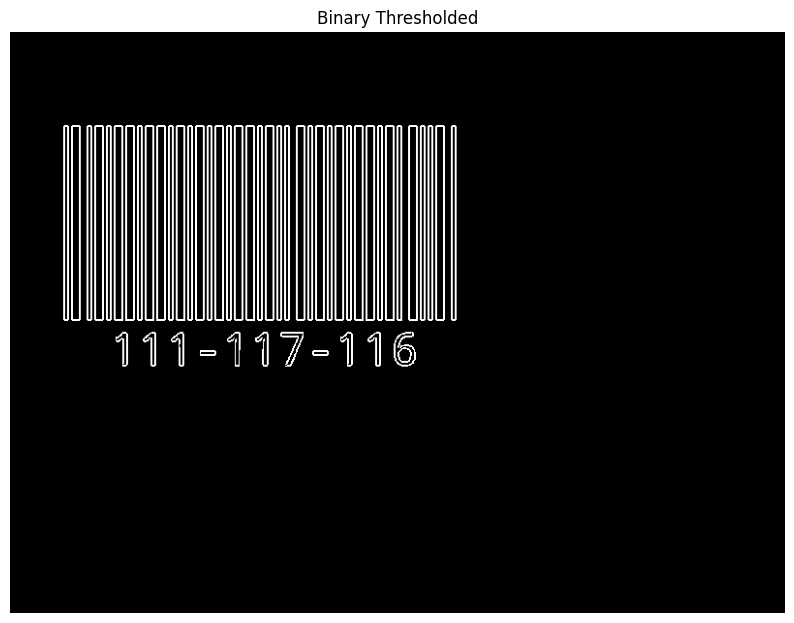

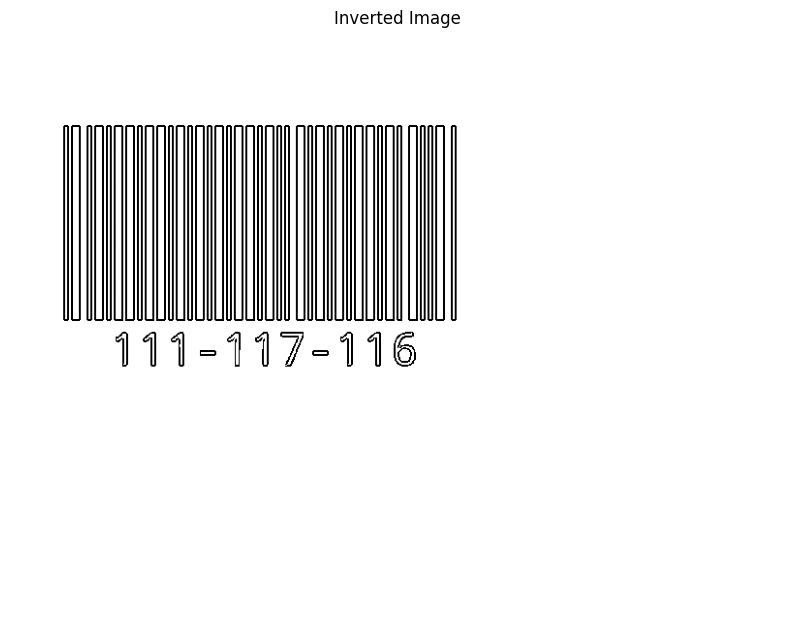

Processed image saved to cropped_image.jpg


In [186]:
# Example usage
#process_image('C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//05 - meen taffa el nour!!!.jpg', 'cropped_image.jpg')
process_image('C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//06 - meen fata7 el nour 333eenaaayy.jpg', 'cropped_image.jpg')
